---
# **Lab 1 - Logic Gates Simulation** 

## **Group 5**
### Abhimukth Chaudhuri
### Aurelia Haas 


---
# **Google Colab Environment Setup for CUDA**

## Uninstall previous version of CUDA - refresh cloud version of CUDA**

In [ ]:
# Uninstall previous version of CUDA - refresh cloud version of CUDA 
!apt-get --purge remove cuda nvidia* libnvidia-*
!dpkg -l | grep cuda- | awk '{print $2}' | xargs -n1 dpkg --purge
!apt-get remove cuda-*
!apt autoremove
!apt-get update

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'nvidia-kernel-common-418-server' for glob 'nvidia*'
Note, selecting 'nvidia-325-updates' for glob 'nvidia*'
Note, selecting 'nvidia-346-updates' for glob 'nvidia*'
Note, selecting 'nvidia-driver-binary' for glob 'nvidia*'
Note, selecting 'nvidia-331-dev' for glob 'nvidia*'
Note, selecting 'nvidia-304-updates-dev' for glob 'nvidia*'
Note, selecting 'nvidia-compute-utils-418-server' for glob 'nvidia*'
Note, selecting 'nvidia-384-dev' for glob 'nvidia*'
Note, selecting 'nvidia-libopencl1-346-updates' for glob 'nvidia*'
Note, selecting 'nvidia-fs-prebuilt' for glob 'nvidia*'
Note, selecting 'nvidia-driver-440-server' for glob 'nvidia*'
Note, selecting 'nvidia-340-updates-uvm' for glob 'nvidia*'
Note, selecting 'nvidia-dkms-450-server' for glob 'nvidia*'
Note, selecting 'nvidia-kernel-common' for glob 'nvidia*'
Note, selecting 'nvidia-kernel-source-440-server' for glob 'nvidia*'


## Install Cuda v10 - Want to get at least version 9.

In [ ]:
# Install Cuda v10 - Want to get at least version 9.
!wget https://developer.nvidia.com/compute/cuda/9.2/Prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64 -O cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb
!dpkg -i cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb
!apt-key add /var/cuda-repo-9-2-local/7fa2af80.pub
!apt-get update
!apt-get install cuda-10.1

--2021-10-21 00:56:51--  https://developer.nvidia.com/compute/cuda/9.2/Prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64
Resolving developer.nvidia.com (developer.nvidia.com)... 152.195.19.142
Connecting to developer.nvidia.com (developer.nvidia.com)|152.195.19.142|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://developer.nvidia.com/compute/cuda/9.2/prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64 [following]
--2021-10-21 00:56:51--  https://developer.nvidia.com/compute/cuda/9.2/prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64
Reusing existing connection to developer.nvidia.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/9.2/secure/Prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb?94lGD8qjJeUW-2KbVPq6HvEe9WL7tW7mcFZIK2u4HzwWYhMdKLiAV8xubJGWUR_MknKPma6xa1Koy4jnodPLTSDTv1XonYXaWmzClO8Bm-Kh7

## Check CUDA runtime instance

In [ ]:
# Check CUDA runtime instance
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


## Install plugin to run nvcc from notebook cells

In [ ]:
# Install plugin to run nvcc from notebook cells
!pip install git+git://github.com/andreinechaev/nvcc4jupyter.git

  Cloning git://github.com/andreinechaev/nvcc4jupyter.git to /tmp/pip-req-build-avyws1_q
  Running command git clone -q git://github.com/andreinechaev/nvcc4jupyter.git /tmp/pip-req-build-avyws1_q
  Created wheel for NVCCPlugin: filename=NVCCPlugin-0.0.2-py3-none-any.whl size=4305 sha256=6c8617c2b30fb0ffee7961cee3ced6f7e89d7f1d23500baeec7e649629f4a2df
  Stored in directory: /tmp/pip-ephem-wheel-cache-vfapyi1j/wheels/c5/2b/c0/87008e795a14bbcdfc7c846a00d06981916331eb980b6c8bdf
Successfully built NVCCPlugin


---
# **Including Provided Project Files** **texte en gras**


## gputimer.h

In [ ]:
%%writefile gputimer.h
// Taken from Udacity Parallel Programming course

#ifndef __GPU_TIMER_H__
#define __GPU_TIMER_H__

struct GpuTimer
{
      cudaEvent_t start;
      cudaEvent_t stop;
 
      GpuTimer()
      {
            cudaEventCreate(&start);
            cudaEventCreate(&stop);
      }
 
      ~GpuTimer()
      {
            cudaEventDestroy(start);
            cudaEventDestroy(stop);
      }
 
      void Start()
      {
            cudaEventRecord(start, 0);
      }
 
      void Stop()
      {
            cudaEventRecord(stop, 0);
      }
 
      float Elapsed()
      {
            float elapsed;
            cudaEventSynchronize(stop);
            cudaEventElapsedTime(&elapsed, start, stop);
            return elapsed;
      }
};

#endif  /* __GPU_TIMER_H__ */


Writing gputimer.h


## compareResults.cu

In [ ]:
%%writefile compareResults.cu

#include <stdio.h>
#include <stdlib.h>


void compareFiles(char *file_name1, char *file_name2) 
{ 
//get from https://www.tutorialspoint.com/c-program-to-compare-two-files-and-report-mismatches
FILE* fp1 = fopen(file_name1, "r");
FILE* fp2 = fopen(file_name2, "r");
    // fetching character of two file 
    // in two variable ch1 and ch2 
    char ch1 = getc(fp1); 
    char ch2 = getc(fp2); 
  
    // error keeps track of number of errors 
    // pos keeps track of position of errors 
    // line keeps track of error line 
    int error = 0, pos = 0, line = 1; 
  
    // iterate loop till end of file 
    while (ch1 != EOF && ch2 != EOF) 
    { 
        pos++; 
  
        // if both variable encounters new 
        // line then line variable is incremented 
        // and pos variable is set to 0 
        if (ch1 == '\n' && ch2 == '\n') 
        { 
            line++; 
            pos = 0; 
        } 
  
        // if fetched data is not equal then 
        // error is incremented 
        if (ch1 != ch2) 
        { 
            error++; 
            printf("Line Number : %d \tError"
               " Position : %d \n", line, pos); 
        } 
  
        // fetching character until end of file 
        ch1 = getc(fp1); 
        ch2 = getc(fp2); 
    } 
  
    printf("Total Errors : %d\t", error); 
} 

int main(int argc, char *argv[]){

    if( argc < 3) {
      printf("Require two files\n");
      exit(1);
      
   }
compareFiles(argv[1], argv[2]);
}


Writing compareResults.cu


---
#**Sequential**

In [ ]:
%%writefile sequential.cu

# include <stdio.h>
# include <stdlib.h>
# include <sys/time.h>

# define AND 0
# define OR 1
# define NAND 2
# define NOR 3
# define XOR 4
# define XNOR 5

int operate(int input_1, int input_2, int input_gate)
{
    switch(input_gate)
    {
        case AND:
            return input_1 && input_2;
        case OR:
            return input_1 || input_2;
        case NAND:
            return !(input_1 && input_2);
        case NOR:
            return !(input_1 || input_2);
        case XOR:
            return input_1 ^ input_2;
        case XNOR:  
            return !(input_1 ^ input_2);
        default:
            return 0;
    }       
}

void sequential(char *input_file_name, int input_file_length, char *output_file_name) 
{ 
    // Allow reading the input file and writing in the output file
    FILE *input_file = fopen(input_file_name, "r");
    FILE *output_file = fopen(output_file_name, "w");
 
    char line[10];  // Line buffer

    // Allocate memory space for all the inputs and outputs
    int *array_input_1 = (int *)malloc(input_file_length * sizeof(int));
    int *array_input_2 = (int *)malloc(input_file_length * sizeof(int));
    int *gate = (int *)malloc(input_file_length * sizeof(int));
    int *output = (int *)malloc(input_file_length * sizeof(int));

    int index = 0;
    while (fgets(line, sizeof(line), input_file)) {
        // Get first and second input, and gate in integer
        array_input_1[index] = line[0] - '0';
        array_input_2[index] = line[2] - '0';
        gate[index] = line[4] - '0';

        index += 1;
    }
 
    // Starting a timer prior to starting the computation
    struct timeval first_timepoint, second_timepoint, time_elapsed;
    gettimeofday(&first_timepoint, NULL);

    // Starting computation with components that need to be timed using boolean logic
    for(int i = 0; i < input_file_length; i++)
    {
        output[i] = operate(array_input_1[i], array_input_2[i], gate[i]);
    }

    gettimeofday(&second_timepoint, NULL);
    timersub(&second_timepoint, &first_timepoint, &time_elapsed);
    //printf("N = %d - Elapsed Time: %ld.%06ld s\n", input_file_length, (long int)time_elapsed.tv_sec, (long int)time_elapsed.tv_usec);

    // Write the values in the output file
    for(int i = 0; i < input_file_length; i++)
    {
        fprintf(output_file, "%d\n", output[i]);
    }

    // Close files 
    fclose(input_file);
    fclose(output_file);
 
    // Free allocated memory
    free(array_input_1);
    free(array_input_2);
    free(gate);
    free(output);
} 


// First argument - input file path
// Second arguments - input file length
// Third argument - output file path
int main(int argc, char *argv[]){

    if( argc < 4) {
        printf("Error: 3 arguments are expected - <input_file_path> <input_file_length> <output_file_path>\n");
        return -1;
    }

    sequential(argv[1], atoi(argv[2]), argv[3]);
}

Writing sequential.cu


In [ ]:
%%script bash
nvcc sequential.cu -o sequential
nvcc compareResults.cu -o compareResults

# Check runtime for all files
num_lines=(10000 100000 1000000)
for t in ${num_lines[@]}; do
    ./sequential input_$t.txt $t output_sequential_$t.txt
    ./compareResults output_sequential_$t.txt sol_$t.txt
    echo ""
done

Total Errors : 0	
Total Errors : 0	
Total Errors : 0	


In [ ]:
# This function would plot the running time for the sequential program, but in this lab it is not required
# import matplotlib.pyplot as plt

# # Using values from experiments run during lab
# number_of_elements = [10000, 100000, 1000000]

# # Rounding up time elapsed to nearest second. 
# # Note that values produced for subsequent runs may differ slightly
# # Plot is made to get a general understanding of how runtime is affected as more threads are used 
# time_elapsed = [0.000283, 0.002640, 0.026395]

# plt.figure(figsize=(10, 5))
# plt.plot(number_of_elements, time_elapsed, marker="x", markersize="10")
# plt.title("Running Time of Sequential Program")
# plt.xlabel("Number of Elements per file")
# plt.ylabel("Time Elapsed (s)")
# plt.show()

---
#**Parallelal Explicit**

In [ ]:
%%writefile parallelal_explicit.cu

#include "gputimer.h"

#include <stdio.h>
#include <stdlib.h>
#include <cuda_runtime.h>
#include <sys/time.h>

# define AND 0
# define OR 1
# define NAND 2
# define NOR 3
# define XOR 4
# define XNOR 5

__global__ void kernel_compute(int * input_kernel_1, int * input_kernel_2, int * gate_kernel, int * output_kernel, int total_threads)
{
    int index = threadIdx.x + (blockIdx.x * blockDim.x);
 
    // Check that the thread number does not exceed the index
    if(index < total_threads)
    { 
        int output;
        int input_1 = input_kernel_1[index];
        int input_2 = input_kernel_2[index];
        int input_gate = gate_kernel[index];
     
        switch(input_gate)
        {
            case AND:
                output = input_1 && input_2;
                break;
            case OR:
                output = input_1 || input_2;
                break;
            case NAND:
                output = !(input_1 && input_2);
                break;
            case NOR:
                output = !(input_1 || input_2);
                break;
            case XOR:
                output = input_1 ^ input_2;
                break;
            case XNOR:  
                output = !(input_1 ^ input_2);
                break;
            default:
                output = 0;
        }     
        output_kernel[index] = output;
    }
}

void parallelal_explicit(char * input_file_name, int input_file_length, char * output_file_name) 
{ 
    // Allow reading the input file and writing in the output file
    FILE *input_file = fopen(input_file_name, "r");
    FILE *output_file = fopen(output_file_name, "w");
 
    char line[10];
 
    int num_bytes = input_file_length * sizeof(int);

    // Allocate space for all the inputs and outputs in CPU
    int *array_input_1 = (int *)malloc(num_bytes);
    int *array_input_2 = (int *)malloc(num_bytes);
    int *gate = (int *)malloc(num_bytes);
    int *output = (int *)malloc(num_bytes);
 
    int index = 0;
    while (fgets(line, sizeof(line), input_file)) {
        // Get first and second input, and gate in integer
        array_input_1[index] = line[0] - '0';
        array_input_2[index] = line[2] - '0';
        gate[index] = line[4] - '0';

        index += 1;
    }

 
    int * input_kernel_1, * input_kernel_2, *gate_kernel, * output_kernel;

    // Allocate space for all the inputs and outputs in GPU
    // Start the timer as done in Lab 0
    cudaMalloc((void**)&input_kernel_1, num_bytes);
    cudaMalloc((void**)&input_kernel_2, num_bytes);
    cudaMalloc((void**)&gate_kernel, num_bytes);
    cudaMalloc((void**)&output_kernel, num_bytes);

    struct GpuTimer timer_migrate, timer_execution;
    
    timer_migrate.Start();
    cudaMemcpy((void *)input_kernel_1, (void *)array_input_1, num_bytes, cudaMemcpyHostToDevice);
    cudaMemcpy((void *)input_kernel_2, (void *)array_input_2, num_bytes, cudaMemcpyHostToDevice);
    cudaMemcpy((void *)gate_kernel, (void *)gate, num_bytes, cudaMemcpyHostToDevice);
    timer_migrate.Stop();

    timer_execution.Start();

    // Calculate blocks and threads
    // If more than 1024 threads are needed, by default, it uses 1024 threads per block
    
    int num_blocks = 0;
    int num_threads = 0;
    if (input_file_length > 1024) {
        num_blocks = ceil((float) input_file_length / 1024);
        num_threads = 1024;
    } else {
        num_blocks = 1;
        num_threads = input_file_length;
    }
    
    kernel_compute<<<num_blocks, num_threads>>>(input_kernel_1, input_kernel_2, gate_kernel, output_kernel, input_file_length);
    
    // Wait for device to finish computation
    cudaDeviceSynchronize();
 
    timer_execution.Stop();

    cudaMemcpy((void *)output, (void *)output_kernel, num_bytes, cudaMemcpyDeviceToHost);
 
    printf("Total threads: %d - Migration time: %f s\n", input_file_length, timer_migrate.Elapsed());
    printf("Total threads: %d - Execution Time Elapsed: %f s\n", input_file_length, timer_execution.Elapsed());

    cudaFree((void *)input_kernel_1);
    cudaFree((void *)input_kernel_2);
    cudaFree((void *)gate_kernel);
    cudaFree((void *)output_kernel);

    // Write the values in the output file
    for(int i = 0; i < input_file_length; i++)
    {
        fprintf(output_file, "%d\n", output[i]);
    }

    // Close files and free memory
    fclose(input_file);
    fclose(output_file);
 
    free(array_input_1);
    free(array_input_2);
    free(gate);
    free(output);
} 


// First argument - input file path
// Second arguments - input file length
// Third argument - output file path
int main(int argc, char *argv[]){

    if( argc < 4) {
        printf("Error: 3 arguments are expected - <input_file_path> <input_file_length> <output_file_path>\n");
        return -1;
    }

    parallelal_explicit(argv[1], atoi(argv[2]), argv[3]);
}


Overwriting parallelal_explicit.cu


In [ ]:
%%script bash

nvcc parallelal_explicit.cu -o parallelal_explicit
nvcc compareResults.cu -o compareResults

# Check runtime for all files
num_lines=(10000 100000 1000000)
for t in ${num_lines[@]}; do
    ./parallelal_explicit input_$t.txt $t output_parallelal_explicit_$t.txt
    ./compareResults output_parallelal_explicit_$t.txt sol_$t.txt
    echo ""
done

Total threads: 10000 - Migration time: 0.090976 s
Total threads: 10000 - Execution Time Elapsed: 0.140576 s
Total Errors : 0	
Total threads: 100000 - Migration time: 0.426880 s
Total threads: 100000 - Execution Time Elapsed: 0.213024 s
Total Errors : 0	
Total threads: 1000000 - Migration time: 2.155296 s
Total threads: 1000000 - Execution Time Elapsed: 0.286464 s
Total Errors : 0	


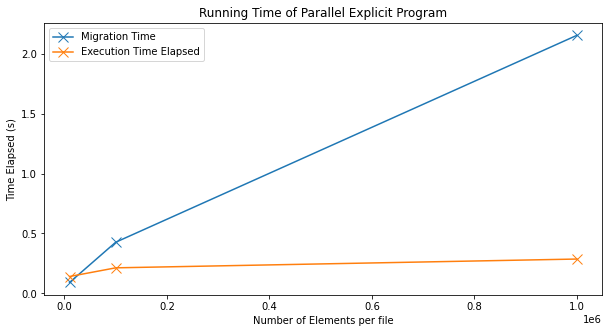

In [3]:
import matplotlib.pyplot as plt

# Using values from experiments run during lab
number_of_elements = [10000, 100000, 1000000]

# Rounding up time elapsed to nearest second. 
# Note that values produced for subsequent runs may differ slightly
# Plot is made to get a general understanding of how runtime is affected as more threads are used 
migration_time = [0.090976, 0.426880, 2.155296]
execution_time_elapsed = [0.140576, 0.213024, 0.286464]

plt.figure(figsize=(10, 5))
plt.plot(number_of_elements, migration_time, marker="x", markersize="10", label="Migration Time")
plt.plot(number_of_elements, execution_time_elapsed, marker="x", markersize="10", label="Execution Time Elapsed")
plt.title("Running Time of Parallel Explicit Program")
plt.xlabel("Number of Elements per file")
plt.ylabel("Time Elapsed (s)")
plt.legend()
plt.show()

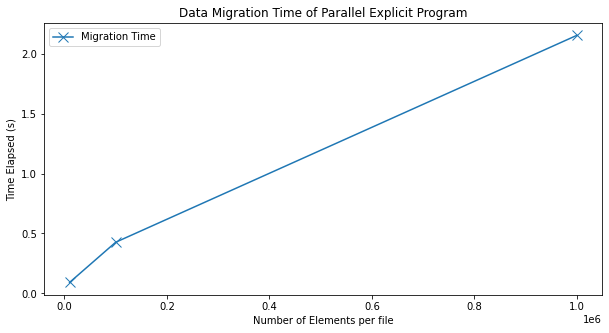

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(number_of_elements, migration_time, marker="x", markersize="10", label="Migration Time")
plt.title("Data Migration Time of Parallel Explicit Program")
plt.xlabel("Number of Elements per file")
plt.ylabel("Time Elapsed (s)")
plt.legend()
plt.show()

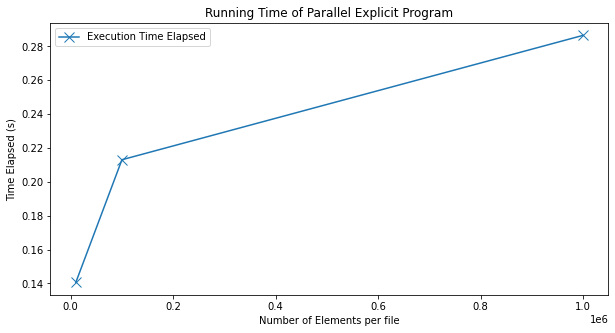

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(number_of_elements, execution_time_elapsed, marker="x", markersize="10", label="Execution Time Elapsed")
plt.title("Running Time of Parallel Explicit Program")
plt.xlabel("Number of Elements per file")
plt.ylabel("Time Elapsed (s)")
plt.legend()
plt.show()

---
#**Parallelal Unified**

In [ ]:
%%writefile parallelal_unified.cu

#include "gputimer.h"

#include <stdio.h>
#include <stdlib.h>
#include <cuda_runtime.h>
#include <sys/time.h>

#define AND 0
#define OR 1
#define NAND 2
#define NOR 3
#define XOR 4
#define XNOR 5

__global__ void kernel_compute(int * input_kernel_1, int * input_kernel_2, int * gate_kernel, int * output_kernel, int total_threads)
{
    int index = threadIdx.x + blockIdx.x * blockDim.x;
 
    // Verify that thread number does not exceed index
    if(index < total_threads)
    { 
        int output;
        int input_1 = input_kernel_1[index];
        int input_2 = input_kernel_2[index];
        int input_gate = gate_kernel[index];

        switch(input_gate)
        {
            case AND:
                output = input_1 && input_2;
                break;
            case OR:
                output = input_1 || input_2;
                break;
            case NAND:
                output = !(input_1 && input_2);
                break;
            case NOR:
                output = !(input_1 || input_2);
                break;
            case XOR:
                output = input_1 ^ input_2;
                break;
            case XNOR:  
                output = !(input_1 ^ input_2);
                break;
            default:
                output = 0;
        }      
        output_kernel[index] = output;
    }
}

void parallelal_unified(char * input_file_name, int input_file_length, char * output_file_name) 
{ 
    // Allow reading the input file and writing in the output file
    FILE * input_file = fopen(input_file_name, "r");
    FILE * output_file = fopen(output_file_name, "w");
 
    char line[10];
 
    int num_bytes = input_file_length * sizeof(int);
    int * array_input_1, * array_input_2, * gate, * output;
 
    // Allocate space for all the inputs and outputs
    cudaMallocManaged((void**)&array_input_1, num_bytes);
    cudaMallocManaged((void**)&array_input_2, num_bytes);
    cudaMallocManaged((void**)&gate, num_bytes);
    cudaMallocManaged((void**)&output, num_bytes);
 
    int index = 0;
    while (fgets(line, sizeof(line), input_file)) {
        // Get first and second input, and gate in integer
        array_input_1[index] = line[0] - '0';
        array_input_2[index] = line[2] - '0';
        gate[index] = line[4] - '0';

        index += 1;
    }

    // Start the timer
    struct GpuTimer timer;
    timer.Start();
 
    // Calculate blocks and threads
    // If more than 1024 threads are needed, by default, it uses 1024 threads per block
    int num_blocks = 0;
    int num_threads = 0;
    if (input_file_length > 1024) {
        num_blocks = ceil((float) input_file_length / 1024);
        num_threads = 1024;
    } else {
        num_blocks = 1;
        num_threads = input_file_length;
    }
    
    kernel_compute<<<num_blocks, num_threads>>>(array_input_1, array_input_2, gate, output, input_file_length);
    cudaDeviceSynchronize();
    timer.Stop();
 
    printf("Total threads: %d - Total Time Elapsed: %f s\n", input_file_length, timer.Elapsed());

    // Write the values in the output file
    for(int i = 0; i < input_file_length; i++)
    {
        fprintf(output_file, "%d\n", output[i]);
    }

    // Close files and free memory
    cudaFree((void *)array_input_1);
    cudaFree((void *)array_input_2);
    cudaFree((void *)gate);
    cudaFree((void *)output);

    fclose(input_file);
    fclose(output_file);
} 


// First argument - input file path
// Second arguments - input file length
// Third argument - output file path
int main(int argc, char *argv[]){

    if( argc < 4) {
        printf("Error: 3 arguments are expected - <input_file_path> <input_file_length> <output_file_path>\n");
        return -1;
    }

    parallelal_unified(argv[1], atoi(argv[2]), argv[3]);
}


Overwriting parallelal_unified.cu


In [ ]:
%%script bash

nvcc parallelal_unified.cu -o parallelal_unified
nvcc compareResults.cu -o compareResults

# Check runtime for all files
num_lines=(10000 100000 1000000)
for t in ${num_lines[@]}; do
    ./parallelal_unified input_$t.txt $t output_parallelal_unified_$t.txt
    ./compareResults output_parallelal_unified_$t.txt sol_$t.txt
    echo ""
done

Total threads: 10000 - Total Time Elapsed: 0.341120 s
Total Errors : 0	
Total threads: 100000 - Total Time Elapsed: 0.617664 s
Total Errors : 0	
Total threads: 1000000 - Total Time Elapsed: 2.360128 s
Total Errors : 0	


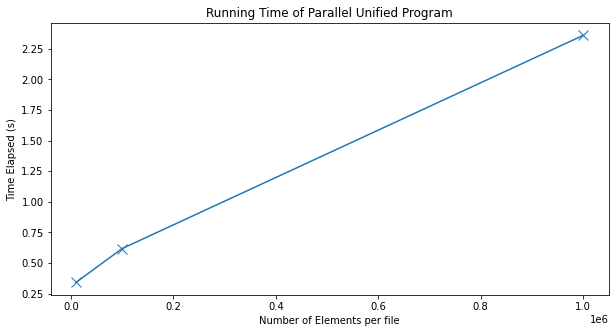

In [2]:
import matplotlib.pyplot as plt

# Using values from experiments run during lab
number_of_elements = [10000, 100000, 1000000]

# Rounding up time elapsed to nearest second. 
# Note that values produced for subsequent runs may differ slightly
# Plot is made to get a general understanding of how runtime is affected as more threads are used 
time_elapsed = [0.341120, 0.617664, 2.360128]

plt.figure(figsize=(10, 5))
plt.plot(number_of_elements, time_elapsed, marker="x", markersize="10")
plt.title("Running Time of Parallel Unified Program")
plt.xlabel("Number of Elements per file")
plt.ylabel("Time Elapsed (s)")
plt.show()

---
#**Parallelal Unified Prefetched**

In [ ]:
%%writefile parallelal_unified_prefetch.cu

#include "gputimer.h"

#include <stdio.h>
#include <stdlib.h>
#include <cuda_runtime.h>
#include <sys/time.h>

#define AND 0
#define OR 1
#define NAND 2
#define NOR 3
#define XOR 4
#define XNOR 5

__global__ void kernel_compute(int * input_kernel_1, int * input_kernel_2, int * gate_kernel, int * output_kernel, int total_threads)
{
    int index = threadIdx.x + blockIdx.x * blockDim.x;
 
    // Verify that thread number does not exceed index
    if(index < total_threads)
    { 
        int output;
        int input_1 = input_kernel_1[index];
        int input_2 = input_kernel_2[index];
        int input_gate = gate_kernel[index];

        switch(input_gate)
        {
            case AND:
                output = input_1 && input_2;
                break;
            case OR:
                output = input_1 || input_2;
                break;
            case NAND:
                output = !(input_1 && input_2);
                break;
            case NOR:
                output = !(input_1 || input_2);
                break;
            case XOR:
                output = input_1 ^ input_2;
                break;
            case XNOR:  
                output = !(input_1 ^ input_2);
                break;
            default:
                output = 0;
        }   
        output_kernel[index] = output;
    }
}

void parallelal_unified_prefetch(char * input_file_name, int input_file_length, char * output_file_name) 
{ 
    // Allow reading the input file and writing in the output file
    FILE * input_file = fopen(input_file_name, "r");
    FILE * output_file = fopen(output_file_name, "w");
 
    char line[10];
 
    int num_bytes = input_file_length * sizeof(int);
    int * array_input_1, * array_input_2, * gate, * output;
 
    // Allocate space for all the inputs and outputs
    cudaMallocManaged((void**)&array_input_1, num_bytes);
    cudaMallocManaged((void**)&array_input_2, num_bytes);
    cudaMallocManaged((void**)&gate, num_bytes);
    cudaMallocManaged((void**)&output, num_bytes);
  
    int index = 0;
    while (fgets(line, sizeof(line), input_file)) {
        // Get first and second input, and gate in integer        
        array_input_1[index] = line[0] - '0';
        array_input_2[index] = line[2] - '0';
        gate[index] = line[4] - '0';

        index += 1;
    }

    // Start the timer
    struct GpuTimer timer;
    timer.Start();
 
    // Prefetch all data to GPU before calling the kernel
    int device = -1;
    cudaGetDevice(&device);
    cudaMemPrefetchAsync(array_input_1, num_bytes, device, NULL);
    cudaMemPrefetchAsync(array_input_2, num_bytes, device, NULL);
    cudaMemPrefetchAsync(gate, num_bytes, device, NULL);
    cudaMemPrefetchAsync(output, num_bytes, device, NULL);
 

    // Calculate blocks and threads
    // If more than 1024 threads are needed, by default, it uses 1024 threads per block
    int num_blocks = 0;
    int num_threads = 0;
    if (input_file_length > 1024) {
        num_blocks = ceil((float) input_file_length / 1024);
        num_threads = 1024;
    } else {
        num_blocks = 1;
        num_threads = input_file_length;
    }
    
    kernel_compute<<<num_blocks, num_threads>>>(array_input_1, array_input_2, gate, output, input_file_length);
    cudaDeviceSynchronize();
 
    timer.Stop();
 
    printf("Total threads: %d - Total Time Elapsed: %f s\n", input_file_length, timer.Elapsed());

    // Write the values in the output file
    for(int i = 0; i < input_file_length; i++)
    {
        fprintf(output_file, "%d\n", output[i]);
    }

    // Close files and free memory
    cudaFree((void *)array_input_1);
    cudaFree((void *)array_input_2);
    cudaFree((void *)gate);
    cudaFree((void *)output);

    fclose(input_file);
    fclose(output_file);
} 


// First argument - input file path
// Second arguments - input file length
// Third argument - output file path
int main(int argc, char *argv[]){

    if( argc < 4) {
        printf("Error: 3 arguments are expected - <input_file_path> <input_file_length> <output_file_path>\n");
        return -1;
    }

    parallelal_unified_prefetch(argv[1], atoi(argv[2]), argv[3]);
}


Overwriting parallelal_unified_prefetch.cu


In [ ]:
%%script bash

nvcc parallelal_unified_prefetch.cu -o parallelal_unified_prefetch
nvcc compareResults.cu -o compareResults

# Check runtime for all files
num_lines=(10000 100000 1000000)
for t in ${num_lines[@]}; do
    ./parallelal_unified_prefetch input_$t.txt $t output_parallelal_unified_prefetch_$t.txt
    ./compareResults output_parallelal_unified_prefetch_$t.txt sol_$t.txt
    echo ""
done

Total threads: 10000 - Total Time Elapsed: 0.568512 s
Total Errors : 0	
Total threads: 100000 - Total Time Elapsed: 0.554304 s
Total Errors : 0	
Total threads: 1000000 - Total Time Elapsed: 2.301920 s
Total Errors : 0	


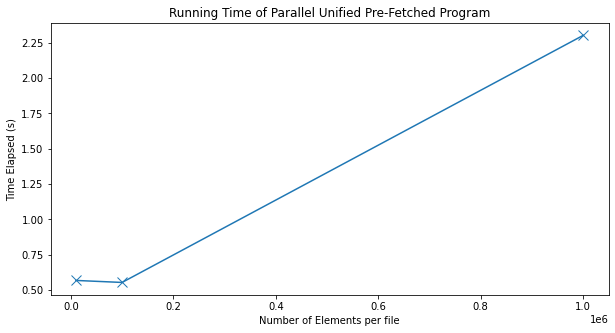

In [1]:
import matplotlib.pyplot as plt

# Using values from experiments run during lab
number_of_elements = [10000, 100000, 1000000]

# Rounding up time elapsed to nearest second. 
# Note that values produced for subsequent runs may differ slightly
# Plot is made to get a general understanding of how runtime is affected as more threads are used 
time_elapsed = [0.568512, 0.554304, 2.301920]

plt.figure(figsize=(10, 5))
plt.plot(number_of_elements, time_elapsed, marker="x", markersize="10")
plt.title("Running Time of Parallel Unified Pre-Fetched Program")
plt.xlabel("Number of Elements per file")
plt.ylabel("Time Elapsed (s)")
plt.show()

---
#**Conclusion**

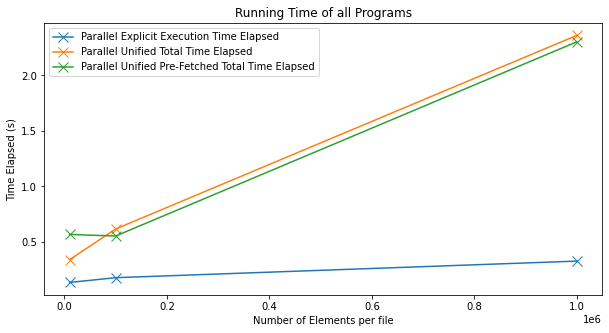

In [ ]:
import matplotlib.pyplot as plt

# Using values from experiments run during lab
number_of_elements = [10000, 100000, 1000000]

# Rounding up time elapsed to nearest second. 
# Note that values produced for subsequent runs may differ slightly
# Plot is made to get a general understanding of how runtime is affected as more threads are used 
parallel_explicit_time_elapsed = [0.136416, 0.179232, 0.328416]
parallel_unified_time_elapsed = [0.341120, 0.617664, 2.360128]
parallel_unified_prefetched_time_elapsed = [0.568512, 0.554304, 2.301920]

plt.figure(figsize=(10, 5))
plt.plot(number_of_elements, parallel_explicit_time_elapsed, marker="x", markersize="10", label="Parallel Explicit Execution Time Elapsed")
plt.plot(number_of_elements, parallel_unified_time_elapsed, marker="x", markersize="10", label="Parallel Unified Total Time Elapsed")
plt.plot(number_of_elements, parallel_unified_prefetched_time_elapsed, marker="x", markersize="10", label="Parallel Unified Pre-Fetched Total Time Elapsed")
plt.title("Running Time of all Programs")
plt.xlabel("Number of Elements per file")
plt.ylabel("Time Elapsed (s)")
plt.legend()
plt.show()